In [1]:
import os
import cv2
import numpy as np

positive_folder = './tests/test01/positive'
negative_folder = './tests/test01/negative'

positive_number = len([name for name in os.listdir(positive_folder) if os.path.isfile(positive_folder+'/'+name)])
negative_number = len([name for name in os.listdir(negative_folder) if os.path.isfile(negative_folder+'/'+name)])
windowSize = (80,80)
positive_dataset = np.zeros((positive_number,80,80,3),dtype=np.uint8)
negative_dataset = np.zeros((negative_number,80,80,3),dtype=np.uint8)
for filename in os.listdir(positive_folder):
    i = 0
    if filename.endswith(".bmp"):
        img = cv2.imread(positive_folder+'/'+filename)
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        positive_dataset[i] = img
        i = i + 1
for filename in os.listdir(negative_folder):
    j = 0
    if filename.endswith(".bmp"):
        img = cv2.imread(negative_folder+'/'+filename)
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        negative_dataset[j] = img
        j = j + 1

positive_output = np.ones(positive_number,dtype=np.uint8)
negative_output = np.zeros(negative_number,dtype=np.uint8)

#dataset = np.concatenate((positive_dataset,negative_dataset),axis=0)
#output = np.concatenate((positive_output,negative_output),axis=0)

number_data = positive_number + negative_number
x_train = np.concatenate((positive_dataset[0:300],negative_dataset[0:100]),axis=0)
y_train = np.concatenate((positive_output[0:300],negative_output[0:100]),axis=0)
x_test = np.concatenate((positive_dataset[300:],negative_dataset[100:]),axis=0)
y_test = np.concatenate((positive_output[300:],negative_output[100:]),axis=0)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

((400, 80, 80, 3), (400,), (177, 80, 80, 3), (177,))


In [4]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np

In [3]:
batch_size = 128
num_classes = 2
epochs = 12

In [4]:
img_rows, img_cols = 80, 80

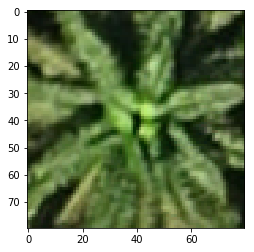

In [5]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()

In [6]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 3, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)
input_shape = (img_rows, img_cols, 3)

In [7]:
print(x_train.shape)
print(x_test.shape)

(400, 80, 80, 3)
(177, 80, 80, 3)


In [8]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [9]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [10]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
metrics=['accuracy'])

In [11]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
validation_data=(x_test, y_test))

Train on 400 samples, validate on 177 samples
Epoch 1/12
400/400 [==============================] - 19s - loss: 0.7297 - acc: 0.5800 - val_loss: 0.6902 - val_acc: 0.6215
Epoch 2/12
400/400 [==============================] - 19s - loss: 0.7019 - acc: 0.7500 - val_loss: 0.7299 - val_acc: 0.6215
Epoch 3/12
400/400 [==============================] - 19s - loss: 0.6099 - acc: 0.7500 - val_loss: 0.8674 - val_acc: 0.6215
Epoch 4/12
400/400 [==============================] - 19s - loss: 0.6300 - acc: 0.7500 - val_loss: 0.6661 - val_acc: 0.6215
Epoch 5/12
400/400 [==============================] - 18s - loss: 0.6218 - acc: 0.7500 - val_loss: 0.6835 - val_acc: 0.6215
Epoch 6/12
400/400 [==============================] - 18s - loss: 0.6088 - acc: 0.7500 - val_loss: 0.6719 - val_acc: 0.6215
Epoch 7/12
400/400 [==============================] - 19s - loss: 0.6145 - acc: 0.7500 - val_loss: 0.7249 - val_acc: 0.6215
Epoch 8/12
400/400 [==============================] - 18s - loss: 0.5991 - acc: 0.7500

In [12]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.82817826298
Test accuracy: 0.621468926554


In [13]:
predict_img = cv2.imread('tests/test01/0.bmp')
predict_img = cv2.cvtColor(predict_img,cv2.COLOR_BGR2RGB)
x_predict = np.zeros((1,80,80,3),dtype=np.uint8)
x_predict[0] = predict_img

In [14]:
print(x_predict.shape)

(1, 80, 80, 3)


In [15]:
model.predict_classes(x_predict)

1/1 [==============================] - 0s


array([1])

In [16]:
np.unique(y_train)

array([ 0.,  1.])

In [17]:
num_classes

2

In [18]:
model.save_weights('treecounting01.h5')

In [19]:
model_json = model.to_json()
model_filename = 'treecounting01.json'
with open(model_filename, "w") as json_file:
    json_file.write(model_json)

In [1]:
from keras.models import model_from_json
json_file = open('treecounting01.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

Using TensorFlow backend.


In [2]:
loaded_model.load_weights("treecounting01.h5")

In [5]:
loaded_model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
metrics=['accuracy'])

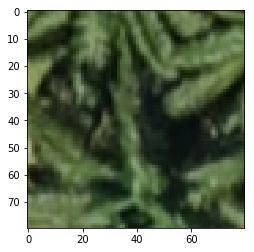

In [8]:
import cv2
import numpy as np
evaluate_img_file = './tests/test01/evaluate/rect.tif'
evaluate_img = cv2.imread(evaluate_img_file)
evaluate_img = cv2.cvtColor(evaluate_img,cv2.COLOR_BGR2RGB)
evaluate_img = cv2.resize(evaluate_img,(80,80))
import matplotlib.pyplot as plt
plt.imshow(evaluate_img)
plt.show()

In [10]:
x_evaluate = np.zeros((1,80,80,3),dtype=np.uint8)
x_evaluate[0] = evaluate_img

In [13]:
loaded_model.predict_classes(x_evaluate)

1/1 [==============================] - 0s


array([1])